In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df = pd.read_csv(r'/Users/Milos/Desktop/Finance Practice/Credit Card customers/BankChurners.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [240]:
unqiue_values = df['Attrition_Flag'].unique()
unqiue_values

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [241]:
churned = df[df['Attrition_Flag'] == 'Attrited Customer']
churned.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [242]:
# Total Customers count

Total_customers = df['CLIENTNUM'].count()

# Attrited Customers count

churned_customers = churned['CLIENTNUM'].count()

# Existing Customers count

existing_customers = Total_customers - churned_customers



print("Total customers: ",Total_customers)
print("Churned customers: ",churned_customers)
print("Existing customers: ", existing_customers)
print("Churn rate: ", (churned_customers / Total_customers * 100).round(2))


Total customers:  10127
Churned customers:  1627
Existing customers:  8500
Churn rate:  16.07


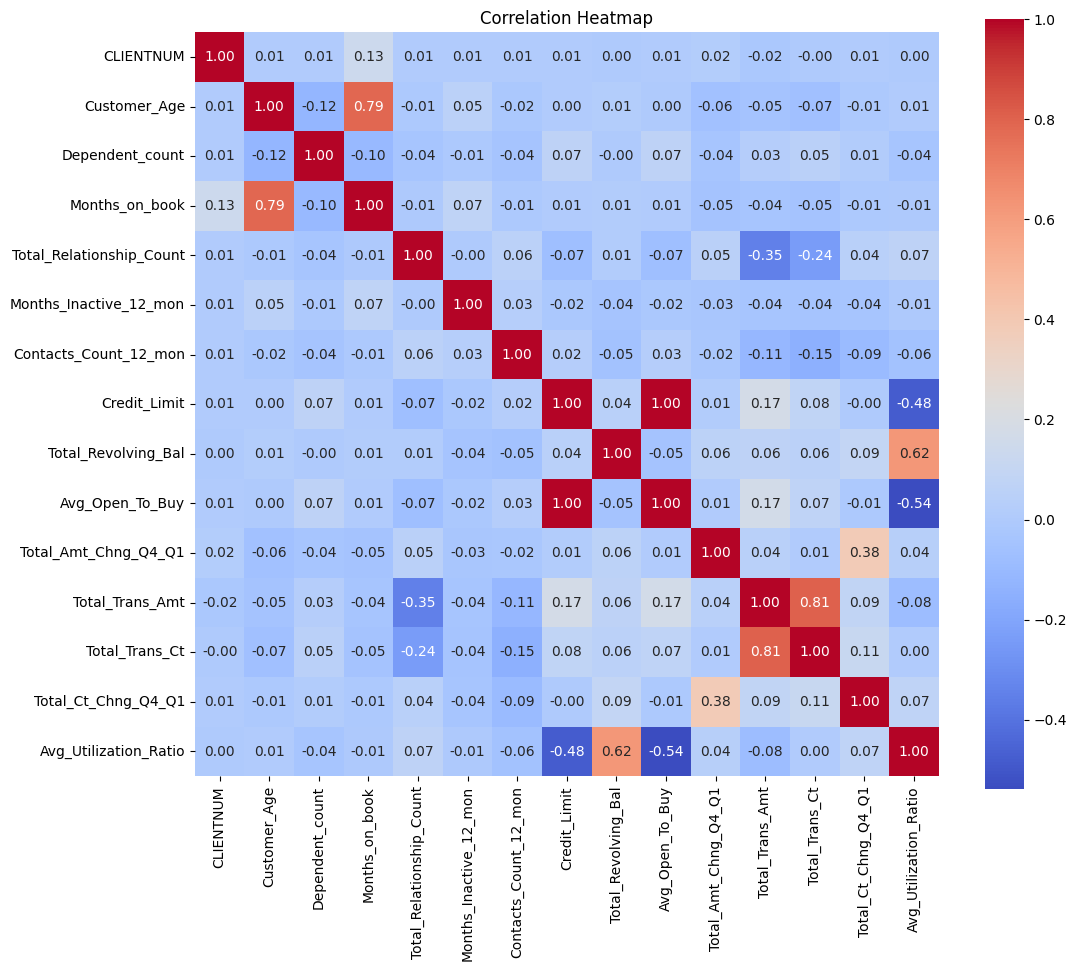

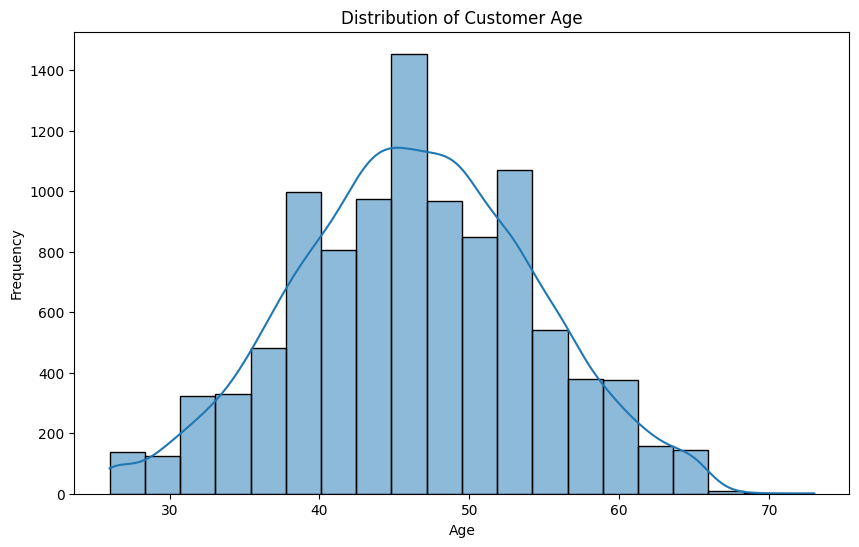

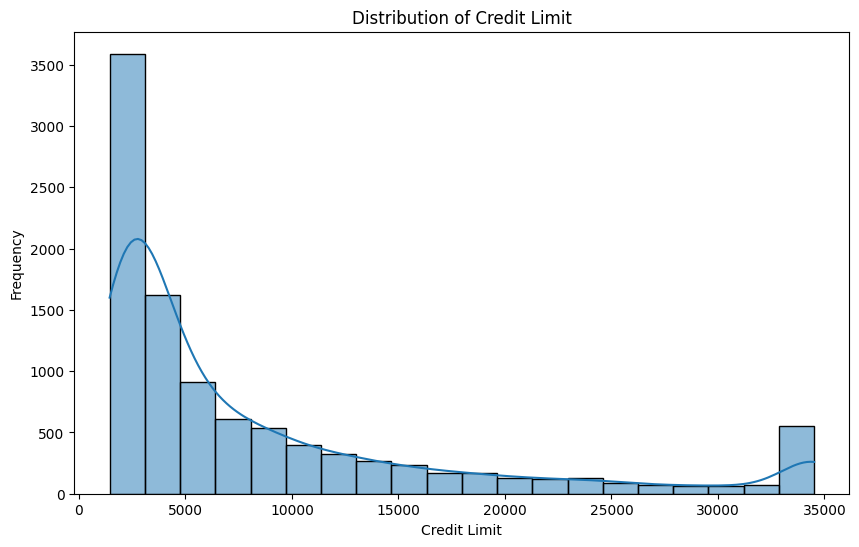

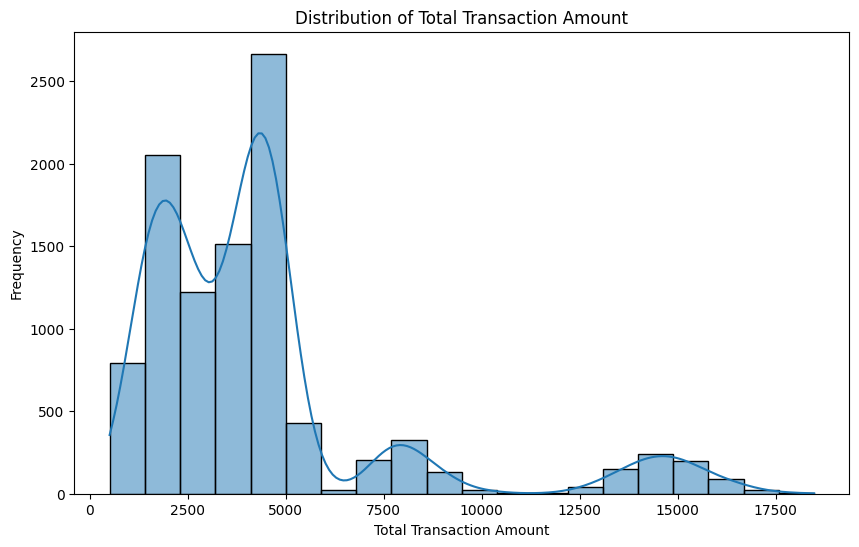

In [243]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

# Correlation matrix

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Age

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Credit Limit

plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Limit'], bins=20, kde=True)
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# Distribution of Total Transaction Amount

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Trans_Amt'], bins=20, kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [244]:
print(df['Gender'].unique())
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())
print(df['Income_Category'].unique())
print(df['Card_Category'].unique())


['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [245]:
for col in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    df[col] = df[col].astype(str).str.strip().str.title()


In [246]:
def Encoding (df):

    # Attrition Flag Coding
    df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
    
    # Gender Coding

    df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})


    # Education Level Coding

    education_mapping = {
        'Unknown': 0,
        'Uneducated': 1,
        'High School': 2,
        'College': 3,
        'Graduate': 4,
        'Post-Graduate': 5,
        'Doctorate': 6
    }

    df['Education_Level'] = df['Education_Level'].map(education_mapping)

    # Marital Status Coding

    marital_mapping = {
        'Unknown': 0,
        'Single': 1,
        'Married': 2,
        'Divorced': 3
    }
    df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)


    # Income Category Coding
    print(df['Income_Category'].unique())

    income_mapping = {
        'Unknown': 0,
        'Less Than $40K': 1,
        '$40K - $60K': 2,
        '$60K - $80K': 3,
        '$80K - $120K': 4,
        '$120K +': 5
    }

    df['Income_Category'] = df['Income_Category'].map(income_mapping)

    # Card Category Coding
    card_mapping = {
        'Unknown': 0,
        'Blue': 1,
        'Silver': 2,
        'Gold': 3,
        'Platinum': 4
    }

    df['Card_Category'] = df['Card_Category'].map(card_mapping)

Encoding(df)    
   
# Check for any NaNs or unmatched categories
print(df.info)
print(df.head(10))

['$60K - $80K' 'Less Than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
<bound method DataFrame.info of        CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45       1                3   
1      818770008               0            49       0                5   
2      713982108               0            51       1                3   
3      769911858               0            40       0                4   
4      709106358               0            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50       1                2   
10123  710638233               1            41       1                2   
10124  716506083               1            44       0                1   
10125  717406983               1            30       1                2   
10126  714337233               1            43       0      

In [247]:
y = df['Attrition_Flag']
X = df.drop('Attrition_Flag', axis=1)


print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64


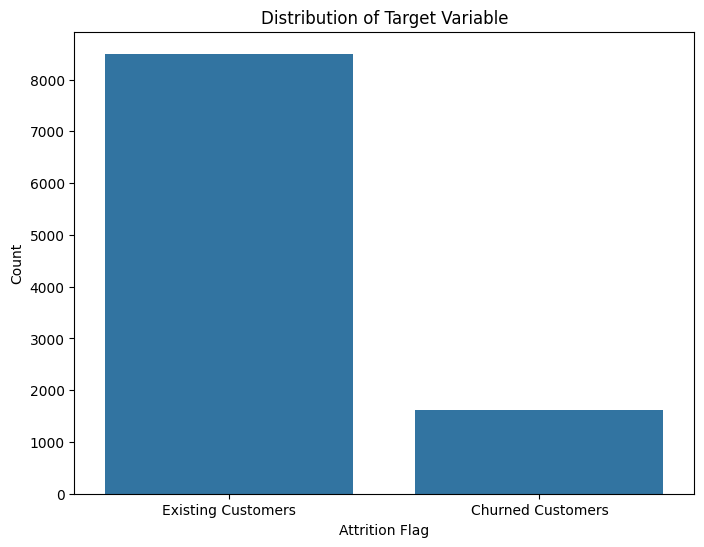

In [248]:
# Check for Imbalanced classes

print(y.value_counts(normalize=True))
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.xticks([0, 1], ['Existing Customers', 'Churned Customers'])
plt.show()


Original dataset shape: (10127, 20) (10127,)
Resampled dataset shape: (17000, 20) (17000,)
Attrition_Flag
0    0.5
1    0.5
Name: proportion, dtype: float64


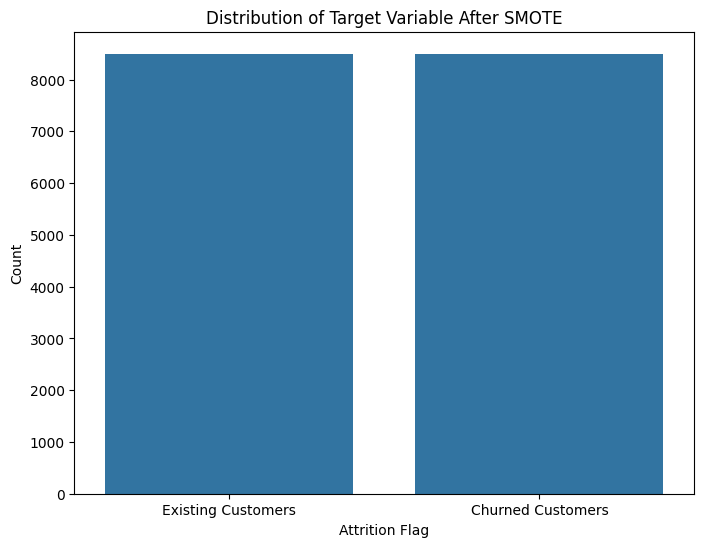

In [249]:
# Balance the dataset using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=15)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
# Check the distribution of the target variable after SMOTE
print(y_resampled.value_counts(normalize=True))
# Plot the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.xticks([0, 1], ['Existing Customers', 'Churned Customers'])
plt.show()


(8101, 20) (8101,)
(2026, 20) (2026,)
(8101, 20)
(2026, 20)
Confusion Matrix:
[[1681   18]
 [  67  260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.94      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy Score:
0.9580454096742349
1. Feature Total_Trans_Amt (0.18714569721126048)
2. Feature Total_Trans_Ct (0.16867416919259487)
3. Feature Total_Revolving_Bal (0.10151994137935531)
4. Feature Total_Ct_Chng_Q4_Q1 (0.1005125862833378)
5. Feature Total_Relationship_Count (0.06742419331278823)
6. Feature Avg_Utilization_Ratio (0.06548064442835341)
7. Feature Total_Amt_Chng_Q4_Q1 (0.05884570166017892)
8. Feature Customer_Age (0.032742332551732097)
9. Feature Credit_Limit (0.030109334857724813)
10. Feature Avg_Open_To_Buy (0.0300018042374061

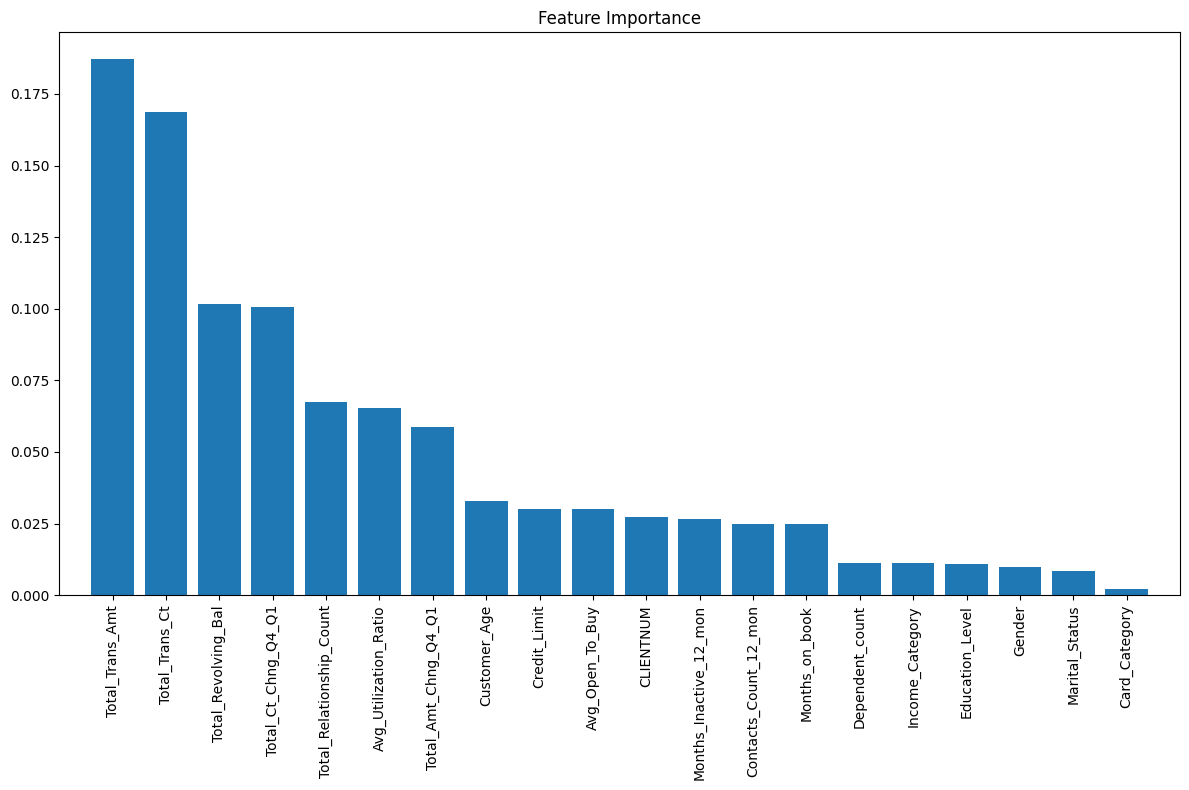

In [250]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

# Model Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions

y_pred = rf_model.predict(X_test_scaled)

# Evaluation

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance

importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plotting Feature Importance

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [251]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=15, penalty='elasticnet', l1_ratio=0.4)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_log_reg))

# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=15)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

Logistic Regression Confusion Matrix:
[[1646   53]
 [ 149  178]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.77      0.54      0.64       327

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

Logistic Regression Accuracy Score:
0.9002961500493584
SVM Confusion Matrix:
[[1654   45]
 [ 152  175]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.80      0.54      0.64       327

    accuracy                           0.90      2026
   macro avg       0.86      0.75      0.79      2026
weighted avg       0.90      0.90      0.89      2026

SVM Accuracy Score:
0.9027640671273445


Random Forest CV Scores: [0.9611351  0.96111111 0.9617284  0.95864198 0.96049383]
Random Forest CV Mean Score: 0.9606220820861988
Logistic Regression CV Scores: [0.90684762 0.90679012 0.90555556 0.89814815 0.9117284 ]
Logistic Regression CV Mean Score: 0.9058139694290219
SVM CV Scores: [0.90931524 0.90925926 0.90555556 0.90185185 0.91358025]
SVM CV Mean Score: 0.9079124302175916


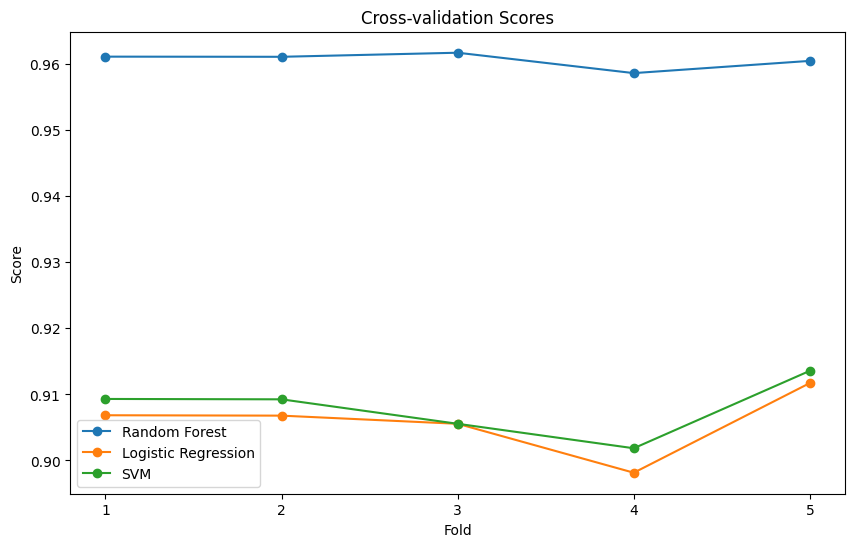

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Confusion Matrix:
[[1678   21]
 [  67  260]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.93      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.96      0.96      0.96      2026

Best Random Forest Accuracy Score:
0.9565646594274433


E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Logistic Regression Confusion Matrix:
[[1646   53]
 [ 149  178]]
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.77      0.54      0.64       327

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

Best Logistic Regression Accuracy Score:
0.9002961500493584
Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best SVM Confusion Matrix:
[[1638   61]
 [  80  247]]
Best SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1699
           1       0.80      0.76      0.78       327

    accuracy                           0.93      2026
   macro avg       0.88      0.86      0.87      2026
weighted

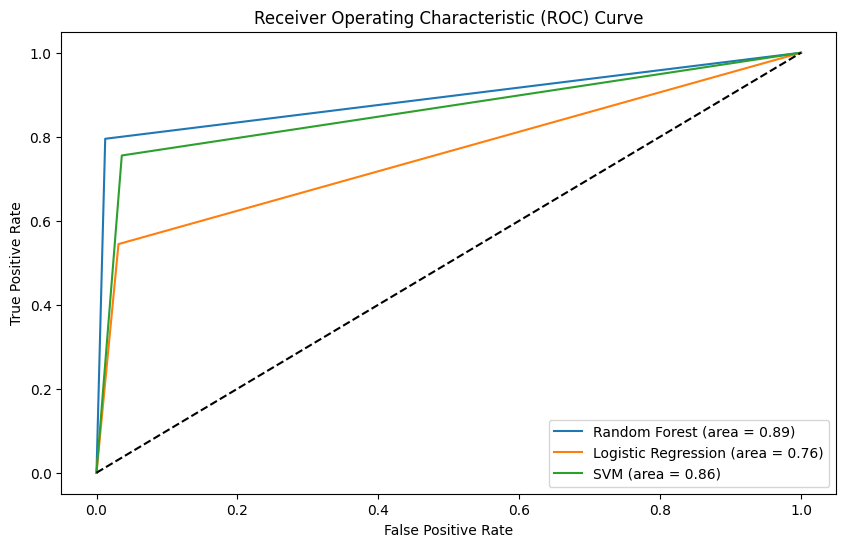

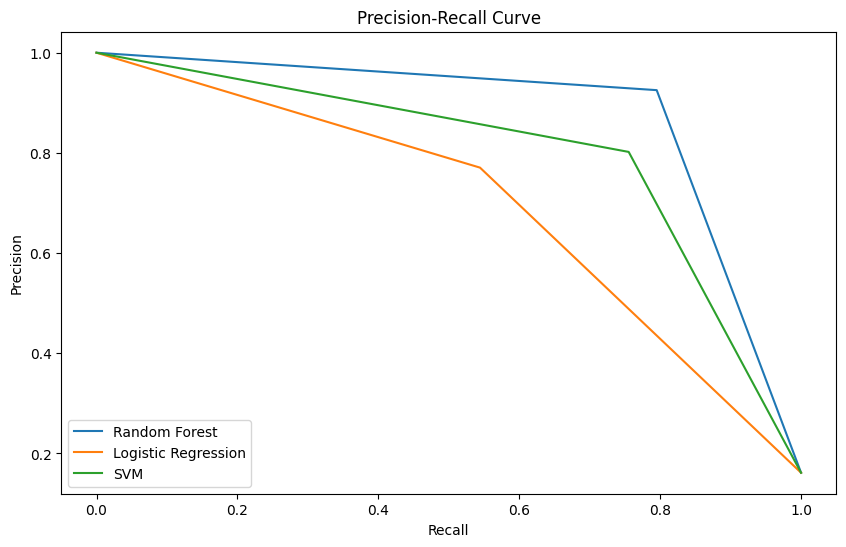

In [252]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest

rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest CV Mean Score:", rf_cv_scores.mean())

# Cross-validation for Logistic Regression

log_reg_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Scores:", log_reg_cv_scores)
print("Logistic Regression CV Mean Score:", log_reg_cv_scores.mean())

# Cross-validation for SVM

svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("SVM CV Scores:", svm_cv_scores)
print("SVM CV Mean Score:", svm_cv_scores.mean())

# Plotting Cross-validation Scores

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rf_cv_scores, marker='o', label='Random Forest')
plt.plot(range(1, 6), log_reg_cv_scores, marker='o', label='Logistic Regression')
plt.plot(range(1, 6), svm_cv_scores, marker='o', label='SVM')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# Hyperparameter Tuning for Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print("Best Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Best Random Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_best_rf))

# Hyperparameter Tuning for Logistic Regression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1']
}
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5)
grid_search_log_reg.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)
best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg_model.predict(X_test_scaled)
print("Best Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log_reg))
print("Best Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log_reg))
print("Best Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_best_log_reg))

# Hyperparameter Tuning for SVM

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_scaled)
print("Best SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_svm))
print("Best SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))
print("Best SVM Accuracy Score:")
print(accuracy_score(y_test, y_pred_best_svm))

# Plotting ROC Curve

from sklearn.metrics import roc_curve, auc
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_best_rf)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_best_log_reg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_best_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (area = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_best_rf)
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_best_log_reg)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_best_svm)
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_log_reg, precision_log_reg, label='Logistic Regression')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()


In [ ]:
# Save the best model
import joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(best_log_reg_model, 'best_logistic_regression_model.pkl')
joblib.dump(best_svm_model, 'best_svm_model.pkl')
# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')
# Make predictions with the loaded model
y_pred_loaded_model = loaded_model.predict(X_test_scaled)
print("Loaded Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_loaded_model))
print("Loaded Model Classification Report:")
print(classification_report(y_test, y_pred_loaded_model))
print("Loaded Model Accuracy Score:")
print(accuracy_score(y_test, y_pred_loaded_model))
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')



Loaded Model Confusion Matrix:
[[1678   21]
 [  67  260]]
Loaded Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.93      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.96      0.96      0.96      2026

Loaded Model Accuracy Score:
0.9565646594274433


' new_data = np.array([[1, 2, 3, 4, 5]])  # Replace with your new data\nscaled_new_data = loaded_scaler.transform(new_data)\nprint("Scaled New Data:", scaled_new_data) '

In [ ]:
# Predicting on same data using best model



# Check the predicted values
print(df[['CLIENTNUM', 'Attrition_Flag', 'Predicted_Attrition_Flag']].head(10))
# Churn rate by predicted values
churn_rate = df.groupby('Predicted_Attrition_Flag')['CLIENTNUM'].count() / df['CLIENTNUM'].count() * 100
print("Churn rate by predicted values:")
print(churn_rate)


# Churn matrix

churn_matrix = pd.crosstab(df['Attrition_Flag'], df['Predicted_Attrition_Flag'], rownames=['Actual'], colnames=['Predicted'])
print(churn_matrix)

# Plotting the churn matrix

plt.figure(figsize=(8, 6))
sns.heatmap(churn_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Churn Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Predicted_Attrition_Flag
